In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.ndimage.interpolation import shift

from get_hierarchical_df import hierarchical_df

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

plt.rcParams.update({'font.size': 12,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'lines.linewidth': 2,
                    'axes.labelsize': 12,
                    'figure.figsize': (13, 6)})

ebov_1 = pd.read_csv('cross_corr_data/ebov_1.csv')
ebov_2 = pd.read_csv('cross_corr_data/ebov_2.csv')
lassa = pd.read_csv('cross_corr_data/lassa.csv')
marv_1 = pd.read_csv('cross_corr_data/marv_1.csv')
marv_2 = pd.read_csv('cross_corr_data/marv_2.csv')
nipah = pd.read_csv('cross_corr_data/nipah.csv')
plague = pd.read_csv('cross_corr_data/plague.csv')

dfs = [ebov_1, ebov_2, lassa, marv_1, marv_2, nipah, plague]
df_labels = ['ebov_1', 'ebov_2', 'lassa', 'marv_1', 'marv_2', 'nipah', 'plague']
ebov_1

,Unnamed: 0,RespMean_Mean_Frames,HR_Mean_Frames,AOPAMean_Mean_Frames,RR_Mean_Frames,RespMean_Mean_MaxCorr,HR_Mean_MaxCorr,AOPAMean_Mean_MaxCorr,RR_Mean_MaxCorr
0,e1001,-6.0,-4.0,-3.0,-0.0,2.803357,11.854656,6.194737,7.415444
1,e1004,-31.0,-29.0,-74.0,-26.0,5.485220,12.405225,2.034529,7.572583
2,e1005,-40.0,-16.0,-59.0,-14.0,2.911193,2.497570,1.312523,2.052130
3,e1009,-32.0,-36.0,-95.0,-33.0,19.734145,19.485141,6.801433,10.948237
4,e1011,-15.0,-20.0,-31.0,-18.0,7.570320,5.963445,6.153462,3.933540
5,e1015,-5.0,-7.0,-81.0,-0.0,6.486324,13.938982,1.747100,8.859008


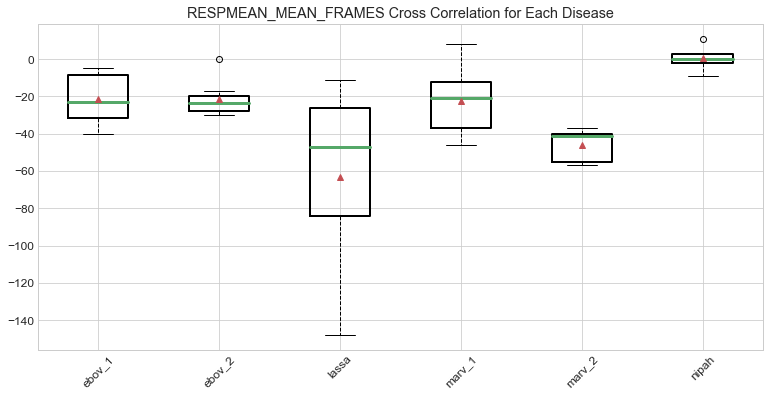

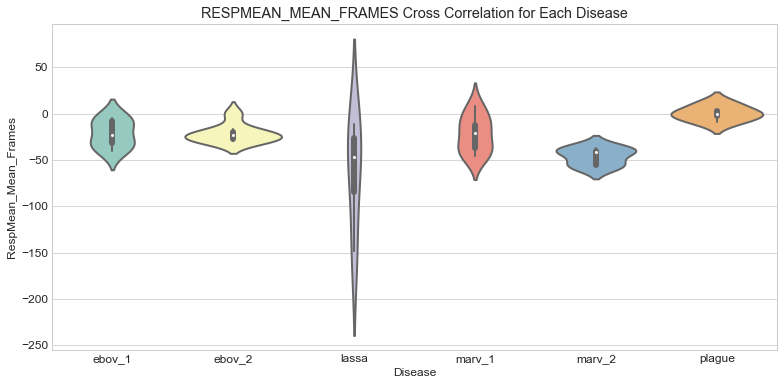

In [183]:
def boxplot(subj):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.boxplot([df[
        subj] for df in dfs if pd.notnull(
        df[subj]).all()],
              showmeans=True,
              boxprops={'lw': 2},
              whiskerprops={'ls': '--'},
              medianprops={'lw': 3})
    ax.set_xticklabels(df_labels, rotation=45)
    plt.title(subj.upper() + ' Cross Correlation for Each Disease')
    plt.show()
    
def gen_all_df(fet):
    fets = pd.concat([df[fet] for df in dfs]).to_numpy()
    srs = np.array([])
    for df, label in zip(dfs, df_labels):
        srs = np.append(srs, np.repeat(label, len(df)))
    return pd.DataFrame({'Disease': srs, fet: fets}).dropna()
    
def violinplot(fet):
    df = gen_all_df(fet)
    sns.violinplot(x='Disease', y=fet, data=df, palette='Set3')
    plt.title(fet.upper() + ' Cross Correlation for Each Disease')
    plt.show()
    
boxplot('RespMean_Mean_Frames')
violinplot('RespMean_Mean_Frames')
resp_desc = gen_all_df('RespMean_Mean_Frames').describe()

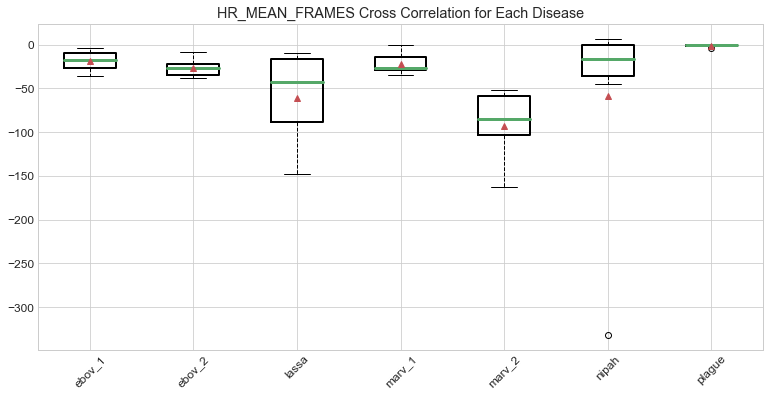

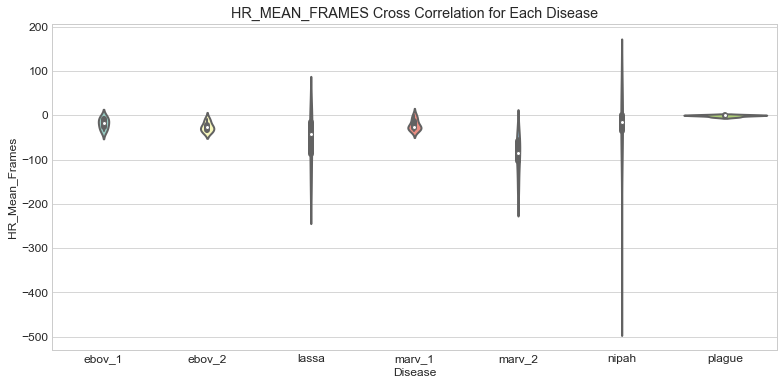

In [184]:
boxplot('HR_Mean_Frames')
violinplot('HR_Mean_Frames')
hr_desc = gen_all_df('HR_Mean_Frames').describe()

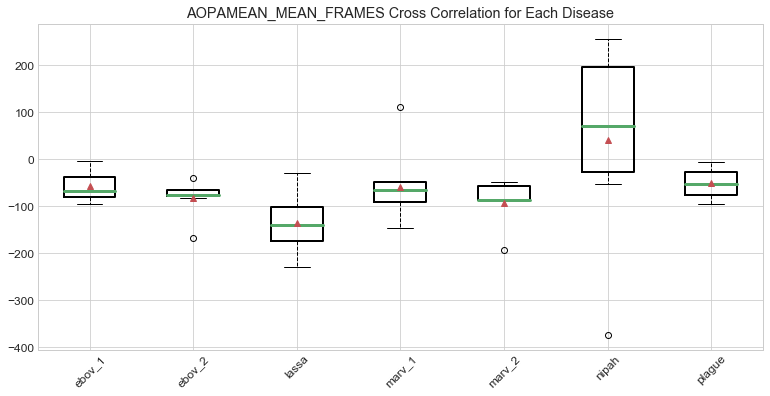

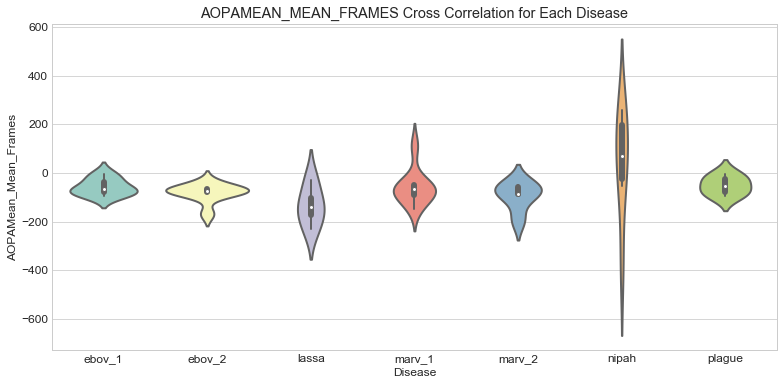

In [185]:
boxplot('AOPAMean_Mean_Frames')
violinplot('AOPAMean_Mean_Frames')
aopa_desc = gen_all_df('AOPAMean_Mean_Frames').describe()

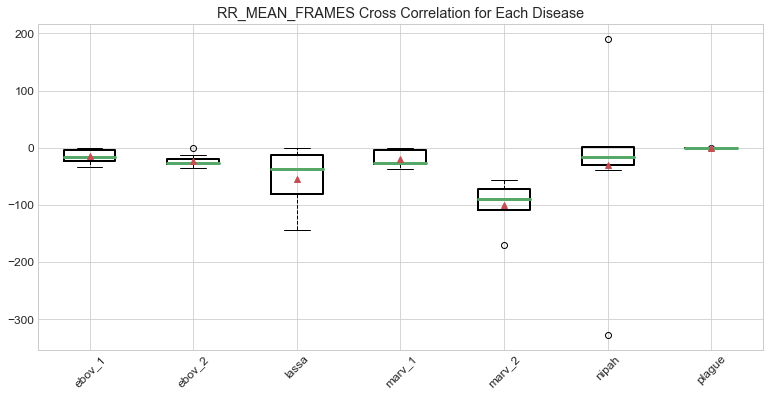

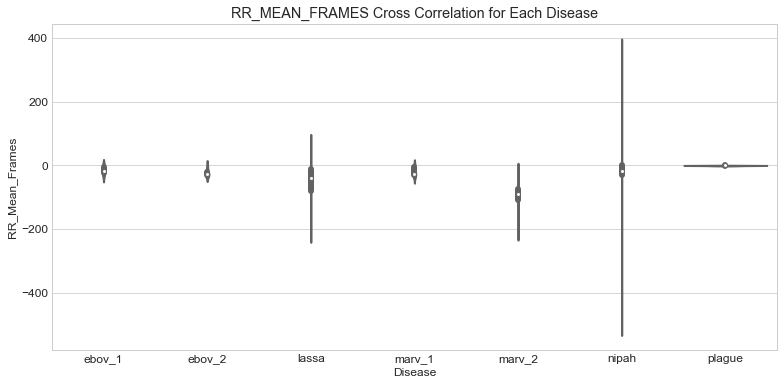

In [186]:
boxplot('RR_Mean_Frames')
violinplot('RR_Mean_Frames')
rr_desc = gen_all_df('RR_Mean_Frames').describe()

In [191]:
stats = pd.concat([aopa_desc, resp_desc, rr_desc, hr_desc], axis=1)
stats

,AOPAMean_Mean_Frames,RespMean_Mean_Frames,RR_Mean_Frames,HR_Mean_Frames
count,43.000000,36.000000,43.000000,43.000000
mean,-56.674419,-27.277778,-32.279070,-38.069767
std,107.014401,27.796825,68.384531,58.341521
min,-374.000000,-148.000000,-328.000000,-332.000000
25%,-88.500000,-37.750000,-34.000000,-37.000000
50%,-65.000000,-26.000000,-23.000000,-26.000000
75%,-37.000000,-10.500000,-0.500000,-7.500000
max,257.000000,11.000000,191.000000,7.000000
